# 1.数据预处理

## 1.1数据无量纲化

### 1.1.1归一化

In [2]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

import pandas as pd
pd.DataFrame(data)

#实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [3]:
#归一化结果逆转
result_ = scaler.fit_transform(data)
scaler.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [4]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=[5,10])
result = scaler.fit_transform(data)
result

#当X中的特征数量非常多的时候，fit会报错
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [11]:
#使用numpy实现归一化
import numpy as np
x = np.array([[-1,2],[-0.5,6],[0,10],[1,18]])

#归一化
x_nor = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
#逆转归一化
x_returned = x_nor * (x.max(axis=0) - x.min(axis=0)) + x.min(axis=0)
x_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### 1.1.2标准化

In [15]:
from sklearn.preprocessing import StandardScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

scaler = StandardScaler()
scaler.fit(data)

scaler.mean_

array([-0.125,  9.   ])

In [16]:
scaler.var_

array([ 0.546875, 35.      ])

In [17]:
x_std = scaler.transform(data)

x_std.mean()

0.0

In [18]:
x_std.std()

1.0

In [19]:
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [20]:
scaler.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 1.2缺失值

In [21]:
import pandas as pd
data = pd.read_csv("Narrativedata.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [26]:
#填补age列
#sklearn当中特征矩阵必须是二维
age = data["Age"].values.reshape(-1,1)
age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()         #默认均值
imp_median = SimpleImputer(strategy="median")#中位数
imp_0 = SimpleImputer(strategy="constant",fill_value=0)#0填补

imp_mean = imp_mean.fit_transform(age)
imp_median = imp_median.fit_transform(age)
imp_0 = imp_0.fit_transform(age)

imp_mean[:20]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765]])

In [30]:
imp_median[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [31]:
imp_0[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [32]:
data["Age"] = imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [33]:
#众数填补Embarked
Embarked = data["Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy="most_frequent")
data["Embarked"] = imp_mode.fit_transform(Embarked)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [35]:
#pandas numpy填补
import pandas as pd
data = pd.read_csv("Narrativedata.csv",index_col=0)

data["Age"] = data["Age"].fillna(data['Age'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [36]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


## 1.3处理分类型特征：编码与哑变量
-- 将文字型数据转换为数值型

### 1.3.1preprocessing.LabelEncoder：标签专用，能够将分类转换为分类数值


In [38]:
from sklearn.preprocessing import LabelEncoder

y = data['Survived']

le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)

le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [39]:
label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [40]:
le.fit_transform(y)

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [41]:
le.inverse_transform(label)

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [42]:
# 实用代码
from sklearn.preprocessing import LabelEncoder
data['Survived'] = LabelEncoder().fit_transform(data['Survived'])

### 1.3.2preprocessing.OrdinalEncoder：特征专用，能够将分类特征转换为分类数值

In [47]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()

data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


### 1.3.3独热编码
-- 特征转换为哑变量

In [48]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [50]:
from sklearn.preprocessing import OneHotEncoder
x = data.iloc[:,1:-1]

enc = OneHotEncoder(categories="auto").fit(x)
result = enc.transform(x).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [51]:
# 实用代码
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(categories="auto").fit_transform(x).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [52]:
#还原
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
884,male,S
885,female,S
886,female,S
887,male,C


In [53]:
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [54]:
result.shape

(889, 5)

In [61]:
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


## 1.4处理连续型特征：二值化与分段
--根据阈值将数据二值化

### 1.4.1sklearn.preprocessing.Binarizer

In [64]:
data_2 = data.copy()

from sklearn.preprocessing import Binarizer
x = data_2.iloc[:,0].values.reshape(-1,1)
transformer = Binarizer(threshold=30).fit_transform(x)

transformer[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

### 1.4.2preprocessing.KBinsDiscretizer

In [70]:
from sklearn.preprocessing import KBinsDiscretizer

x = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')

set(est.fit_transform(x).ravel())


{0.0, 1.0, 2.0}

In [80]:
est = KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')

est.fit_transform(x).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [76]:
est = KBinsDiscretizer(n_bins=3,encode='onehot-dense',strategy='uniform')

# est.fit_transform(x).toarray()
# set(est.fit_transform(x).ravel())
est.fit_transform(x)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 2.特征选择

In [2]:
#导入数据
import pandas as pd

data = pd.read_csv('digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

(42000, 784)

## 2.1Filter过滤法
--在维持算法表现的前提下，帮助算法们降低计算成本。

### 2.1.1方差过滤

In [6]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
x_var0 = selector.fit_transform(x)

x_var0.shape

(42000, 708)

In [7]:
import numpy as np
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

x.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [91]:
np.median(x.var().values)

1352.286703180131

In [92]:
x_fsvar.shape

(42000, 392)

In [93]:
x_bvar = VarianceThreshold(.8 * (1-.8)).fit_transform(x)
x_bvar.shape

(42000, 685)

### 方差过滤对模型的影响

In [8]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

x = data.iloc[:,1:]
y = data.iloc[:,0]
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [96]:
#KNN方差过滤前
%%timeit
cross_val_score(KNN(),x,y,cv=5).mean()

34.3 s ± 732 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
#KNN方差过滤后
%%timeit
cross_val_score(KNN(),x_fsvar,y,cv=5).mean()

27.5 s ± 98.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
#随机森林方差过滤前
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

10.3 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
#随机森林方差过滤后
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()

9.21 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2.1.2相关性过滤

### 2.1.2.1卡方过滤

In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_fschi = SelectKBest(chi2, k=300).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 300)

In [11]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.9344761904761905

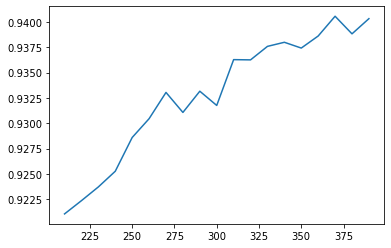

In [17]:
%matplotlib inline
# 选取超参数K
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar,y)
    once = cross_val_score(RFC(n_estimators=10,random_state=24),x_fschi,y,cv=5).mean()
    score.append(once)
    
plt.plot(range(390,200,-10),score)
plt.show()

In [18]:
chivalue, pvalues_chi = chi2(x_fsvar,y)

In [26]:
chivalue[:10]

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931])

In [27]:
pvalues_chi[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
K = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [28]:
k

392

In [25]:
#调节后的超参数K分数
x_fschi = SelectKBest(chi2, k=K).fit_transform(x_fsvar, y)
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.9390476190476191

### 2.1.2.2F检验

In [29]:
from sklearn.feature_selection import f_classif

F, pvalues_f = f_classif(x_fsvar, y)

In [31]:
F[:10]

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412])

In [32]:
pvalues_f[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
K = F.shape[0] - (pvalues_f > 0.05).sum()
K

392

### 2.1.2.3互信息法

In [36]:
from sklearn.feature_selection import mutual_info_classif as MIC

result = MIC(x_fsvar,y)

K = result.shape[0] - sum(result<=0)
K

392

## 2.2Embedded嵌入法

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10,random_state=24)

x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)

x_embedded.shape

(42000, 54)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(x,y).feature_importances_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

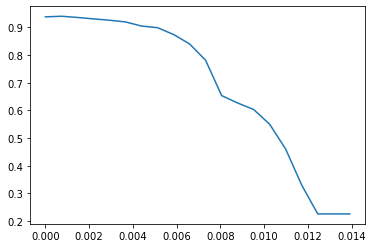

In [41]:
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score.append(once)
    
plt.plot(threshold,score)
plt.show()

In [42]:
x_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(x,y)
x_embedded.shape

(42000, 313)

In [43]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.937904761904762

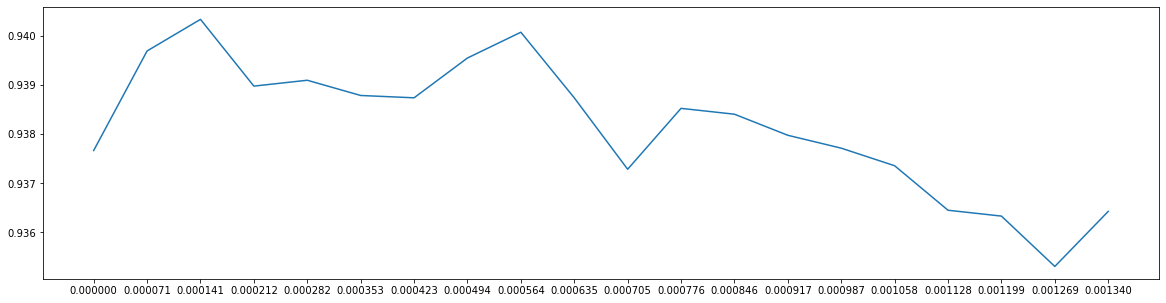

In [44]:
score2=[]
for i in np.linspace(0,0.00134,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
    
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [47]:
x_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(x,y)
x_embedded.shape
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9400714285714284

In [48]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

0.9637857142857144

## 2.3Wrapper包装法
--包装法是最能保证模型效果的特征选择方法<p>
--计算成本是最高的

### feature_selection.RFE

In [51]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=24)
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(x,y)

selector.support_.sum()

340

In [52]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  5,  6,  6,  6,  5,  6,  6,  6,  6,  6,  7,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  5,  3,
        5,  3,  5,  4,  3,  4,  4,  3,  5,  5,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  7,  5,  5,  3,  2,  3,  1,  2,  1,  1,  1,  1,
        1,  2,  2,  5,  5,  5,  4,  7,  9,  9,  9,  9,  9,  8,  9,  8,  5,
        4,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  4,  3,
        5,  6,  9,  9, 10, 10, 10,  8,  5,  5,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  7, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  5,  8,  9, 10, 10, 10, 10,  4,  3,  2,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  8, 10, 10,  9

In [54]:
x_wrapper = selector.transform(x)
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9390000000000001

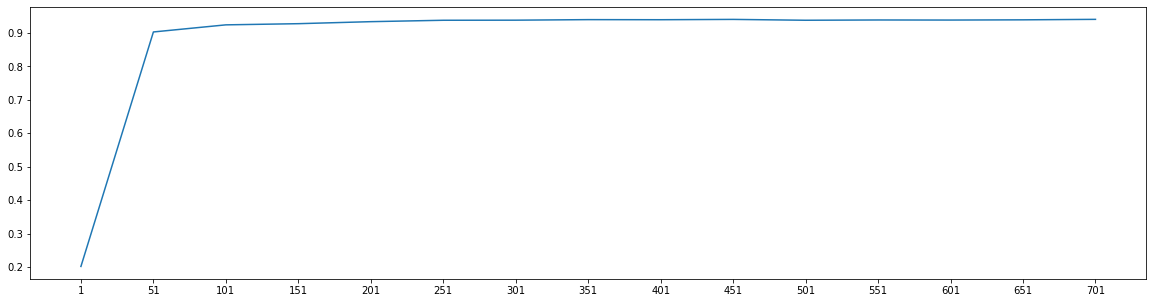

In [56]:
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

# 总结

经验来说，过滤法更快速，但更粗糙。包装法和嵌入法更精确，比较适合具体到算
法去调整，但计算量比较大，运行时间长。当数据量很大的时候，优先使用方差过滤和互信息法调整，再上其他特
征选择方法。使用逻辑回归时，优先使用嵌入法。使用支持向量机时，优先使用包装法。迷茫的时候，从过滤法走
起，看具体数据具体分析。